In [60]:
import tensorflow as tf
import numpy as np
import os, csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
tf.set_random_seed(3)

def initialize_session():
    init = tf.initialize_all_variables()
    #init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    return sess

with open('data2.csv', 'rb') as f:
    try:
        file_reader = csv.reader(f, delimiter=',')
    except IOError:
        print "Error Reading csv File", f
        sys.exit()
    data_ = list(file_reader)[1:-1]

# data = [ d[0:5] + [1] + d[6:] for d in data ]

# batch_size = 2
# data = data[:batch_size]
# print data
# total_data_size = len(data) # total rows of data

# col_length = len(data[0])
    
# X = tf.placeholder(tf.float32, [batch_size, col_length], name='X')
# Y_ = tf.placeholder(tf.float32, [batch_size,], name='Y_')

# Y = tf.nn.batch_normalization(
# X,
# 0, #mean
# 0, #variance
# 0, #offset
# 2, #scale
# 0.05, #variance_epsilon
# )


In [70]:
data = data_ #+ data[::-1]
data = [ d[1:5] +  d[6:9] + d[10:11] + d[12:13] + d[15:16] + d[9:10] + d[11:12] for d in data ]
# [1] is the username encoding
# d[9] is  u'PCpuUsagePercentAvgPercents' and d[11] is  u'PMemUsageMBsAvgMBs'
# data = [ [d[6][:5]] + [d[15][:5]] + d[9:10] + d[11:12] for d in data[:-1] ]

ds = tf.random_shuffle(data)
# ds = tf.random_shuffle(ds)
ds1 = tf.gather(ds, [range(len(data))])
sess1 = initialize_session()
data_shuff = sess1.run(ds1)
print data_shuff[0][0:5]


[['1.0101010110512423' '0' '22.89562289584808' '74.74747474821712'
  '40.28855144627874' '302.5' '128' '14.849242404917497'
  '34.64823227814083' '116' '10.5' '392.5']
 ['0' '0' '28.040540539849616' '64.5270270254193' '32.322812915416335'
  '1369' '163' '0' '0' '119' '51' '652']
 ['0.6688963178278302' '0' '14.381270903624495' '84.28093645852975'
  '42.373254459422064' '383.5' '76' '19.091883092036785'
  '45.254833995939045' '122' '13.5' '383']
 ['0' '0' '24.49664429556256' '71.14093959760383' '31.836638589888175'
  '34.5' '51' '0' '0' '118' '1' '324']
 ['0' '0' '28.378378378617544' '64.86486486562222' '25.0183810907715' '724'
  '36' '0' '0' '110' '27' '429']]


In [72]:

def training_step(i, update_test_data, update_train_data, X, Y_, Y, data_train, data_test, train_step, sess, 
                  col_length, batch_size, labels, labels_test, cross_entropy, accuracy):

    print "\r", i,

    ####### evaluating model performance for printing purposes
    train_c = []
    test_c = []
    train_a = []
    test_a = []

    # feed values include Python scalars, strings, lists, or numpy ndarray
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: data_train, Y_: labels})

    if update_train_data:
        a, c = sess.run([accuracy,cross_entropy], feed_dict={X: data_train, Y_: labels})
        train_a.append(a)
        train_c.append(c)

    if update_test_data and len(data_test) > 0:
        a, c = sess.run([accuracy,cross_entropy], feed_dict={X: data_train, Y_: labels_test})
        test_a.append(a)
        test_c.append(c)
    
    return (train_c, test_c, train_a, test_a)

def train_model(data, data_test, labels, labels_test):
    """
    train the machine learning Model 

    :param: rdd_join: Resilient distributed datasets
    :return: result for ML model
    """

    total_data_size = len(data) # total rows of data
    batch_size = 10
    epoch_size = 5000;

    training_iter = total_data_size / batch_size

#     batch_size = total_data_size / training_iter
    col_length = len(data[0])

    data_train = data
    data_train = np.array(data, dtype=np.float32)
    data_train /= np.std(data_train, axis=0)
    data_test = np.array(data_test, dtype=np.float32)
    data_test /= np.std(data_test, axis=0)
#     print (data_train.shape)
#     labels = np.array(labels, dtype=np.float32)
#     print (labels.shape);

    # 1. Define Variables and Placeholders
    X = tf.placeholder(tf.float32, [batch_size, col_length], name='X') #the first dimension (None) will index the images
    Y_ = tf.placeholder(tf.float32, [batch_size,], name='Y_') # placeholder for correct answers
    
    X = tf.nn.batch_normalization(
    X,
    0.5, #mean
    0.5, #variance
    0.5, #offset
    2, #scale
    0.1, #variance_epsilon
    )

    # Weights initialised with small random values between -0.2 and +0.2
    W1 = tf.Variable(tf.truncated_normal([col_length, 6], stddev=0.09))
    B1 = tf.Variable(tf.zeros([1]))
    W2 = tf.Variable(tf.truncated_normal([6, 3], stddev=0.08))
    B2 = tf.Variable(tf.zeros([1]))
    W3 = tf.Variable(tf.truncated_normal([3, 1], stddev=0.2))
    B3 = tf.Variable(tf.ones([1]))
    
    W4 = tf.Variable(tf.truncated_normal([1, 1], stddev=0.1))
    B4 = tf.Variable(tf.zeros([1]))
    W5 = tf.Variable(tf.truncated_normal([1, 1], stddev=0.1))
    B5 = tf.Variable(tf.zeros([1]))
    W6 = tf.Variable(tf.truncated_normal([1, 1], stddev=0.1))
    B6 = tf.Variable(tf.zeros([1]))
    W7 = tf.Variable(tf.truncated_normal([1, 1], stddev=0.1))
    B7 = tf.Variable(tf.zeros([1]))
    W8 = tf.Variable(tf.truncated_normal([1, 1], stddev=0.1))
    B8 = tf.Variable(tf.zeros([1]))
    W9 = tf.Variable(tf.truncated_normal([1, 1], stddev=0.1))
    B9 = tf.Variable(tf.zeros([1]))
    W10 = tf.Variable(tf.truncated_normal([1, 1], stddev=0.1))
    B10 = tf.Variable(tf.zeros([1]))

    # 2. Define the model

    ######## SIGMOID activation func #######
#     Y1 = tf.nn.sigmoid(tf.matmul(X, W1) + B1)
#     Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
#     Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
#     Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)
#     Y5 = tf.nn.sigmoid(tf.matmul(Y4, W5) + B5)

    ######## ReLU activation func #######
    Y1 = tf.nn.relu(tf.matmul(X, W1) + B1)
#     Y1 = tf.nn.l2_normalize(Y1, 0, epsilon=1e-12, name=None)
    Y1 = tf.nn.dropout(Y1, 0.5, noise_shape=None, seed=None,name='dropoutY1')
    Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
    Y2 = tf.nn.dropout(Y2, 0.5, noise_shape=None, seed=None,name='dropoutY2')
    Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
    Y3 = tf.nn.dropout(Y3, 0.5, noise_shape=None, seed=None,name='dropoutY3')
    Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)
#     Y4 = tf.nn.dropout(Y4, 0.3, noise_shape=None, seed=None,name='dropoutY4')
    Y5 = tf.nn.relu(tf.matmul(Y4, W5) + B5)
#     Y5 = tf.nn.dropout(Y5, 1, noise_shape=None, seed=None,name='dropoutY5')
    Y6 = tf.nn.relu(tf.matmul(Y5, W6) + B6)
#     Y6 = tf.nn.dropout(Y6, 0.5, noise_shape=None, seed=None,name='dropoutY6')
    Y7 = tf.nn.relu(tf.matmul(Y6, W7) + B7)
#     Y7 = tf.nn.dropout(Y7, 0.5, noise_shape=None, seed=None,name='dropoutY7')
    Y8 = tf.nn.relu(tf.matmul(Y7, W8) + B8)
#     Y8 = tf.nn.dropout(Y8, 0.5, noise_shape=None, seed=None,name='dropoutY8')
    Y9 = tf.nn.relu(tf.matmul(Y8, W9) + B9)
#     Y9 = tf.nn.dropout(Y9, 0.5, noise_shape=None, seed=None,name='dropoutY9')
    Y10 = tf.nn.relu(tf.matmul(Y9, W10) + B10)
#     Y10 = tf.nn.dropout(Y10, 0.5, noise_shape=None, seed=None,name='dropoutY10')
    
    Y = Y3
    
    cross_entropy = tf.reduce_sum(tf.pow(Y - Y_, 2))/(2*batch_size) # reduce_mean
#     cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, Y_) )
    
    # Loss function using L2 Regularization
#     regularizer = tf.nn.l2_loss(W1); beta = 0.2
#     cross_entropy = tf.reduce_mean(cross_entropy + beta * regularizer)

    is_correct = tf.equal(tf.argmax(Y,0), tf.argmax(Y_,0))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    
    # 5. Define an optimizer
#     optimizer = tf.train.GradientDescentOptimizer(0.5)
    optimizer = tf.train.AdamOptimizer(0.003)  ## do not use gradient descent 0.005
    train_step = optimizer.minimize(cross_entropy)

    # initialize and train
    sess = initialize_session()
    # 6. Train and test the model, store the accuracy and loss per iteration

    train_c = []
    test_c = []
    train_a = []
    test_a = []

    for k in range(50):
        for i in range(training_iter):
            test = False
            if i % epoch_size == 0:
                test = True
            c, tc, a, ta = training_step(k*training_iter+i, test, test, X, Y_, Y, data_train[i*batch_size:batch_size*(i+1)],
                data_test[i*batch_size:batch_size*(i+1)], train_step, sess, col_length, batch_size,
                labels[i*batch_size:batch_size*(i+1)],labels_test[i*batch_size:batch_size*(i+1)], 
                                  cross_entropy, accuracy)
            train_c += c
            test_c += tc
            train_a += a
            test_a += ta
    print ('Train Cost',train_c)
    print ('Test Cost', test_c)
    return (train_c, test_c, train_a, test_a, training_iter, epoch_size)
    
data = data_shuff[0]
print data[0:5]

data_train = data[:len(data)/2]
data_train = data_train #+ data_train[::-1]
data_test = data[len(data)/2:]
data_test = data_test #+ data_test[::-1]

""" labels being used are indexed at 9 and 11 """
j = len(data_train[0]) - 2
labels_train = [ d[j] for d in data_train ]
data_train = [ d[:j] for d in data_train ]
labels_test = [ d[j] for d in data_test ]
data_test = [ d[:j]  for d in data_test ]

print len(data_train)
print len(data_test)
print data_train[0]
print labels_train[0]
print labels_test[0]
print 'Total Labels -->',len(labels_train)

train_c, test_c, train_a, test_a, training_iter, epoch_size = \
    train_model(data_train, data_test, labels_train, labels_test)

[['1.0101010110512423' '0' '22.89562289584808' '74.74747474821712'
  '40.28855144627874' '302.5' '128' '14.849242404917497'
  '34.64823227814083' '116' '10.5' '392.5']
 ['0' '0' '28.040540539849616' '64.5270270254193' '32.322812915416335'
  '1369' '163' '0' '0' '119' '51' '652']
 ['0.6688963178278302' '0' '14.381270903624495' '84.28093645852975'
  '42.373254459422064' '383.5' '76' '19.091883092036785'
  '45.254833995939045' '122' '13.5' '383']
 ['0' '0' '24.49664429556256' '71.14093959760383' '31.836638589888175'
  '34.5' '51' '0' '0' '118' '1' '324']
 ['0' '0' '28.378378378617544' '64.86486486562222' '25.0183810907715' '724'
  '36' '0' '0' '110' '27' '429']]
4452
4452
['1.0101010110512423' '0' '22.89562289584808' '74.74747474821712'
 '40.28855144627874' '302.5' '128' '14.849242404917497' '34.64823227814083'
 '116']
10.5
48
Total Labels --> 4452
22249 ('Train Cost', [3280.1499, 2784.0872, 2814.1421, 2966.426, 2781.658, 1131.5431, 2460.4363, 2854.4412, 2377.4895, 2104.4419, 2732.6436, 2

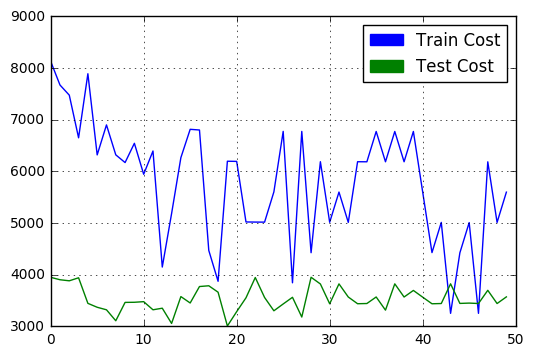

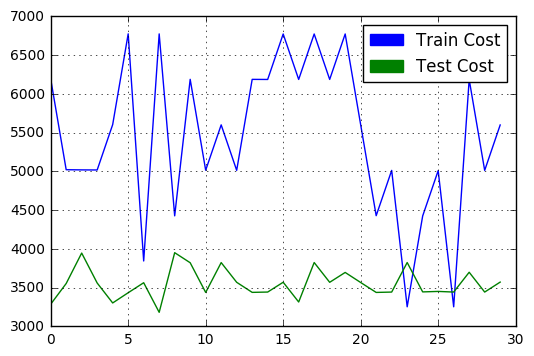

In [25]:
# 7. Plot and visualise the accuracy and loss
# loss training vs testing dataset

# plt.plot(train_a)
# plt.plot(test_a)
# plt.grid(True)
# blue_patch = mpatches.Patch(color='blue', label='Train Accuracy')
# green_patch = mpatches.Patch(color='green', label='Test Accuracy')
# plt.legend(handles=[blue_patch,green_patch])
# plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
blue_patch = mpatches.Patch(color='blue', label='Train Cost')
green_patch = mpatches.Patch(color='green', label='Test Cost')
plt.legend(handles=[blue_patch,green_patch])
plt.show()

# Zoom in on the tail of the plots
zoom_point = 20
x_range = range(zoom_point,training_iter/epoch_size)

# plt.plot(train_a[zoom_point:])
# plt.plot(test_a[zoom_point:])
# plt.grid(True)
# blue_patch = mpatches.Patch(color='blue', label='Train Accuracy')
# green_patch = mpatches.Patch(color='green', label='Test Accuracy')
# plt.legend(handles=[blue_patch,green_patch])
# plt.show()

plt.plot(train_c[zoom_point:90])
plt.plot(test_c[zoom_point:90])
plt.grid(True)
blue_patch = mpatches.Patch(color='blue', label='Train Cost')
green_patch = mpatches.Patch(color='green', label='Test Cost')
plt.legend(handles=[blue_patch,green_patch])
plt.show()